## Use the glycoenzyme gene list to see which are detected in hamster vs CHO

In [1]:
## Parameters specific to where your folders are and your data
parameter_file = 'narresubmission.yaml'

import yaml
import sys

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

import os
#os.chdir(doc['results'])

#data_folder = doc['data_folder']
#tissues = doc['tissues'].split(',')
#sys.path.append(doc['pipeline_path'])
#ref_fa = doc['ref_fa']
#annotation=doc['annotation']
supplemental = doc['global']['SUPPLEMENTAL_DIR']

/home/isshamie/software/anaconda2/envs/TSS/lib/python3.7/site-packages/ipykernel_launcher.py:8: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  


In [2]:
import os
import sys
from os.path import join
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from collections import defaultdict
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm
### notebook specific configuration ###
from os.path import basename
#mpl.style.use('ggplot')
mpl.style.use('fivethirtyeight')
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

#from Homer import *



from tss.visualize.fig_utils import helper_save

import xml.etree.ElementTree as et

params {'PREFIX': 'ncbi_pice_103', 'ROOT_DIR': '/data/isshamie/TSS/', 'DATA_DIR': '/data/isshamie/TSS/NCBI_PICR_103_Processed/', 'DATA_PROCESSED_DIR': '/data/isshamie/TSS/TSS/data/processed/', 'SUPPLEMENTAL_DIR': '/data/isshamie/TSS/Analysis/supplemental/', 'PIPELINE': '/data/isshamie/TSS/tss', 'GENOME_DIR': '/data/isshamie/genome', 'GENOME_FA': '/data/isshamie/genome/picr.fa', 'GENOME_GFF3': '/data/isshamie/genome/updated_final_sort.gff3', 'GENOME_GTF': '/data/isshamie/genome/updated_final_sort.gtf', 'TISSUES': 'BMDM1hKLA,BMDMwt,Brain,FemaleReproductive,Heart,Intestine,', 'META_FILE': '/data/isshamie/TSS/TSS/parameters/raw_metaSamples.tsv'}


In [3]:
import mplh.fig_utils 
from matplotlib import pyplot as plt
import numpy as np
from mplh.fig_utils import show_values_on_bars
import mplh.color_utils  as cu

fig_utils from mplh


## Save directory

In [4]:
#os.chdir(doc["results"])
genome = "GCF"
save_dir = "output_glycogenes"
save_dir = join(save_dir, genome)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

## Load variables

## Load in Glycosylation genes: 


In [5]:
GT = pd.read_excel(join(supplemental,'GT_genes','GTclass.xlsx'))
GT

,N-glycan,O-glycan_Mucin,O-glycan_notMucin,chondroitin sulfate,heparan sulfate,keratan sulfate,GPI-anchor,lacto_neolacto series,ganglio series,globo series,Hyaluronic acid,sphingolipid,SLC_transporter,terminal modification,WT,Others,unassign,additional
0,ALG1,B3GNT6,B3GLCT,B3GALT6,B3GAT3,B4GAT1,DPM2,A(ABO),B3GALT4,A4GALT,HAS1,B4GALT6,SLC35A1,B4GALNT3,WT,UNKNOWN?,FUT11,SFT2
1,ALG2,B4GALT5,B3GAT1,B3GAT3,B3GALT6,B3GNT2,GAA1,B(ABO),B4GALNT1,B3GALT5,HAS2,GAL3ST1,SLC35A2,B4GALNT4,NaN,CMAS,NaN,SFT3
2,ALG3,A4GNT,B3GAT2,B4GALT7,B4GALT7,B3GNT7,PIGA,B3GALT1,B4GALNT2,B3GALNT1,HAS3,CGT,SLC35A3,GAL3ST2,NaN,STT3B,NaN,COLGALT2
3,ALG5,B4GALNT2,B4GALT1,CHPF,EXT1,B4GALT1,PIGB,B3GALT2,ST3GAL1,FUT1,NaN,UGCG,SLC35B1,GAL3ST3,NaN,NaN,NaN,MGAT4C
4,ALG6,C1GALT1,B4GALT2,CSGlcA-T,EXT2,B4GALT2,PIGC,B3GALT5,ST3GAL2,FUT2,NaN,NaN,SLC35B2,GAL3ST4,NaN,NaN,NaN,LHL2
5,ALG8,C1GALT1C1,B4GALT3,CHST3,EXTL1,B4GALT3,PIGF,B4GAT1,ST3GAL5,FUT9,NaN,NaN,SLC35B3,NaN,NaN,NaN,NaN,L5
6,ALG9,GALNT1,B4GALT4,CHST7,EXTL2,B4GALT4,PIGG,B3GNT2,ST6GALNAC3,GBGT1,NaN,NaN,SLC35B4,NaN,NaN,NaN,NaN,HS3ST6
7,ALG10,GALNT2,B3GALNT2,CHST11,EXTL3,CHST1,PIGH,B3GNT3,ST6GALNAC4,ST3GAL1,NaN,NaN,SLC35C1,NaN,NaN,NaN,NaN,COLGALT1
8,ALG11,GALNT3,CHST10,CHST12,HS2ST1,CHST2,PIGK,B3GNT4,ST6GALNAC5,ST3GAL2,NaN,NaN,SLC35D1,NaN,NaN,NaN,NaN,L4_nuc
9,ALG12,GALNT4,EOGT,CHST13,HS3ST1,CHST4,PIGL,B3GNT5,ST6GALNAC6,ST8SIA1,NaN,NaN,SLC35D2,NaN,NaN,NaN,NaN,B3GNT9


In [6]:
txn_df = pickle.load(open(f'{doc["ncbi_picr"]}/tss_annotation/txn_df_02.p','rb'),encoding='latin')

In [7]:
gene_df = pickle.load(open(f'{doc["ncbi_picr"]}/tss_annotation/gene_df_02.p','rb'),encoding='latin')
gene_df

,peaks,closest_to_X_numberOfPeaks,bin_-1000_1000,sameStrand_bin_-1000_1000,samples,minDistance,minDistancePeak,maxValue,maxPeakId,maxSample,Chr,Start,End,Strand,gene,transcript,maxSamples,hasGene,Number of SS
Bmp4,"[1394, 3038, 17698, 17726, 21888, 24414, 35067...",129,"[90264, 97971, 124234, 163408, 181215, 308710,...","[90264, 181215, 308710, 348823]","[MiscOrgans_START1_and_MiscOrgans_startinput1,...",27.0,308710,11864.6,308710,NaN,NW_020822366.1,724583,724584,-,Bmp4,XM_027386528.1,"[MiscOrgans_START1_and_MiscOrgans_startinput1,...",True,4
Cdkn3,"[17679, 17707, 68904, 83014, 89129, 99005, 108...",36,"[138244, 237253]",[237253],"[MiscOrgans_START1_and_MiscOrgans_startinput1,...",74.0,237253,15.3,237253,NaN,NW_020822366.1,1085509,1085510,+,Cdkn3,XM_027386531.1,"[MiscOrgans_START1_and_MiscOrgans_startinput1,...",True,1
Cnih1,"[14157, 68988, 69200, 116089, 132667, 167473, ...",17,"[132667, 298307, 350581, 353645]",[298307],"[MiscOrgans_START1_and_MiscOrgans_startinput1,...",88.0,298307,57.2,298307,NaN,NW_020822366.1,1114325,1114326,-,Cnih1,XM_027386534.1,"[MiscOrgans_START1_and_MiscOrgans_startinput1,...",True,1
Gmfb,"[34817, 35013, 35070, 86845, 97343, 120275, 12...",16,"[35013, 97343, 120275, 122677, 161643, 268973,...",[],[],inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],False,0
Cgrrf1,"[5407, 35121, 224603, 293332, 306506, 338794, ...",10,"[5407, 293332, 306506, 348288, 414132]",[348288],"[MiscOrgans_START1_and_MiscOrgans_startinput1,...",68.0,348288,144.9,348288,NaN,NW_020822366.1,1159951,1159952,+,Cgrrf1,XM_027386536.1,"[MiscOrgans_START1_and_MiscOrgans_startinput1,...",True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LOC113839146,[],0,[],[],[],inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],False,0
LOC113839147,[],0,[],[],[],inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],False,0
LOC103158952,[],0,[],[],[],inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],False,0
LOC113839149,"[141900, 207964]",2,[],[],[],inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],False,0


In [8]:
pd.DataFrame((~GT.isnull()).sum()).plot.bar()

In [9]:
GT_CHO_hom = pd.DataFrame(GT.apply(lambda x: x.isin(gene_df.index.str.upper().values).sum())).rename({0: "CHO homologues"}, axis=1)
GT_merge = pd.concat((GT_CHO_hom , pd.DataFrame((~GT.isnull()).sum()).rename({0: "Human Glycan Synthetic Pathway"}, axis=1)),
         axis=1)
GT_merge["Human Glycan Synthetic Pathway"] -= GT_merge["CHO homologues"]
pd.DataFrame(GT_merge).plot.bar(stacked=True)
plt.title("Human Glycan Synthesis Pathways")

Text(0.5, 1.0, 'Human Glycan Synthesis Pathways')

## Load the sample expression matrix


### Read in promoter output

In [10]:
# This was the old data
# tissues_expr = pd.read_csv("analysis_ncbi_picr/merged/tissues.merge.peaksexpression")
#                            ,sep="\t",index_col=0)
# tissues_expr.head()
tissues_expr = pd.read_csv(join(doc['results'],genome, "tissues_collapse/tissues.merge.peaksexpression")
                           ,sep="\t",index_col=0)
tissues_expr.head()


,MiscOrgans,Liver,Brain,Lung,Heart,CHO,Pancreas,BMDM1hKLA,FemaleReproductive,Muscle,Kidney,Spleen,BMDMwt
0,0.705,0.0,0.790000,2.180000,0.835,26.996,0.000,84.2,0.630,0.715,2.130000,0.000,0.00
1,3.975,1.1,1.608571,16.596667,0.000,0.000,0.000,0.0,4.265,0.545,1.050000,3.385,0.00
2,0.705,0.0,1.887429,2.386667,0.000,19.044,1.490,0.0,4.025,1.100,1.870000,1.255,5.66
3,3.025,0.0,3.914286,1.633333,0.835,1.680,2.385,0.0,6.000,1.495,1.153333,2.875,2.45
4,112.050,29.7,189.308571,50.966667,25.600,20.292,95.500,0.0,136.550,124.150,43.640000,88.550,3.39


In [12]:
tss_meta = pd.read_csv(join(doc['results'],genome, "eTSS/TSS.exp.meta.tsv"),sep="\t",index_col=0)
tss_meta["Name"] = tss_meta.index
tss_meta.set_index("ID",inplace=True)
tss_meta.head()

,Tissues,cs,CHO ATAC Region,Gene,Gene ID,Transcript,Is Experimental,Name
ID,,,,,,,,
348823,"Brain,Spleen,Lung,FemaleReproductive,Kidney,Mi...",0b11,NaN,Bmp4,NaN,XM_027386529.1,1.0,p1@Bmp4_XM_027386529.1
90264,"Brain,Spleen,Lung,FemaleReproductive,Kidney,Mi...",0b00,NaN,Bmp4,NaN,XM_027386529.1,1.0,p2@Bmp4_XM_027386529.1
181215,"Brain,Spleen,Lung,FemaleReproductive,Kidney,Mi...",0b00,NaN,Bmp4,NaN,XM_027386529.1,1.0,p3@Bmp4_XM_027386529.1
308710,"BMDMwt,Brain,Spleen,Lung,Pancreas,FemaleReprod...",0b11,NaN,Bmp4,NaN,XM_027386528.1,1.0,p1@Bmp4_XM_027386528.1
237253,"Brain,Spleen,Lung,CHO,FemaleReproductive,MiscO...",0b11,NaN,Cdkn3,NaN,XM_027386531.1,1.0,p1@Cdkn3_XM_027386531.1


## Extract promoter peaks

In [13]:
prom_tissue = tissues_expr.loc[tissues_expr.index.isin(tss_meta.index)]
prom_tissue.head()

,MiscOrgans,Liver,Brain,Lung,Heart,CHO,Pancreas,BMDM1hKLA,FemaleReproductive,Muscle,Kidney,Spleen,BMDMwt
4,112.050,29.700000,189.308571,50.966667,25.600,20.292,95.50,0.00,136.550,124.150,43.640000,88.550,3.39
5,24.650,13.033333,8.738571,18.000000,2.680,0.000,9.16,0.00,9.400,13.985,15.600000,33.465,1.13
6,14.600,42.913333,1.237143,1.633333,6.640,2.526,5.71,0.00,1.105,8.645,16.833333,2.315,2.64
8,6.795,2.410000,8.634286,6.036667,4.105,2.140,3.57,6.07,7.450,3.410,3.110000,4.135,11.30
12,0.000,5.720000,0.000000,1.440000,0.000,0.000,0.00,0.00,0.000,0.505,0.000000,0.402,0.00


In [14]:
prom_tissue[prom_tissue["CHO"] < 1]

,MiscOrgans,Liver,Brain,Lung,Heart,CHO,Pancreas,BMDM1hKLA,FemaleReproductive,Muscle,Kidney,Spleen,BMDMwt
5,24.650,13.033333,8.738571,18.000000,2.680,0.0000,9.160,0.00,9.400,13.985,15.600000,33.465,1.13
12,0.000,5.720000,0.000000,1.440000,0.000,0.0000,0.000,0.00,0.000,0.505,0.000000,0.402,0.00
13,6.455,0.000000,2.588571,1.226667,0.000,0.0000,0.000,0.00,13.430,0.000,0.000000,0.000,0.00
18,16.200,4.820000,1.560571,13.900000,2.645,0.0000,4.910,21.40,2.765,2.495,1.800000,39.650,107.30
45,0.000,0.000000,0.380000,0.523333,0.000,0.0000,0.000,0.00,1.605,0.000,0.000000,0.565,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540084,1.835,1.803333,3.430000,7.386667,9.540,0.1294,1.490,6.60,5.165,3.950,4.080000,2.885,7.54
540097,2.400,0.000000,0.000000,0.000000,0.000,0.0000,0.885,0.00,0.000,5.200,0.000000,0.000,0.00
540101,0.000,0.000000,2.842857,1.430000,0.000,0.0000,0.000,0.00,4.425,0.000,0.366667,0.000,0.00
540114,3.590,5.066667,8.702857,8.913333,43.050,0.0000,0.000,5.68,9.895,34.100,3.826667,4.400,14.70


In [15]:
prom_tissue.apply(lambda x: x.argmin(),axis=1)

/home/isshamie/software/anaconda2/envs/TSS/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  """Entry point for launching an IPython kernel.


4          BMDM1hKLA
5                CHO
6          BMDM1hKLA
8                CHO
12        MiscOrgans
             ...    
540101    MiscOrgans
540110         Heart
540113    MiscOrgans
540114           CHO
540121    MiscOrgans
Length: 30760, dtype: object

In [16]:
gene_tissue = pd.DataFrame(index=tss_meta["Gene"].unique(), columns=prom_tissue.columns, dtype=float)
for ind, val in tqdm.tqdm_notebook(tss_meta.groupby("Gene")):
    gene_tissue.loc[ind] = prom_tissue.loc[prom_tissue.loc[val.index].sum(axis=1).idxmax()]
    
    
gene_tissue

/home/isshamie/software/anaconda2/envs/TSS/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


,MiscOrgans,Liver,Brain,Lung,Heart,CHO,Pancreas,BMDM1hKLA,FemaleReproductive,Muscle,Kidney,Spleen,BMDMwt
Bmp4,4.700,84.330000,3.284286,3971.433333,76.500,0.000,50.050,0.00,20.085,15.845,51.826667,19.860,1.32
Cdkn3,2.175,0.000000,1.272857,0.716667,0.000,7.048,0.000,0.00,1.495,0.800,0.000000,3.135,2.83
Cnih1,4.170,6.226667,12.377143,23.700000,9.850,6.540,1.790,5.94,13.685,12.045,7.776667,12.970,19.40
Cgrrf1,19.800,63.066667,22.814286,35.200000,12.200,43.120,7.385,36.60,10.250,23.650,45.266667,17.905,38.50
Samd4a,6.875,1.320000,3.035714,8.960000,1.890,10.200,2.090,0.00,5.700,7.630,5.033333,3.790,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LOC113839047,1.130,5.380000,12.437143,16.216667,3.350,2.344,2.685,6.73,1.185,2.275,12.000000,1.780,13.80
LOC113839066,0.000,0.000000,0.286143,0.350000,1.005,4.192,0.000,0.00,0.000,0.000,0.331667,0.000,0.00
LOC113839076,5.770,10.873333,12.025714,8.000000,1.340,3.108,2.385,10.00,5.050,1.995,11.746667,2.860,12.40
LOC113839111,3.950,1.686667,0.854286,1.870000,3.010,29.920,0.000,11.40,3.300,0.000,0.350000,3.615,17.50


## Silenced in CHO but active in other tissues

In [17]:
tissue_df = gene_tissue.loc[:,~(gene_tissue.columns.isin(['CHO']))]
cho_df = gene_tissue.loc[:,(gene_tissue.columns.isin(['CHO']))]

In [18]:
#######################################
def cho_cpmThresh_nTis(tissue_df,cho_df,cpm=1,n_tis=1):
    '''Parameters:
        tissue_df: The genexsample expression matrix. 
        A tissue could have more than one sample, and if at least one is present then it is ok.
    '''
    
    in_cho = cho_df[((cho_df>cpm).any(axis=1))].index.values
    in_cho = list(map(lambda x: x.upper(), in_cho))
    not_in_cho = tissue_df[(np.sum(tissue_df>cpm,axis=1)>=n_tis) & ((cho_df<=cpm).all(axis=1))].index.values
    not_in_cho = list(map(lambda x: x.upper(), not_in_cho))
    return in_cho, not_in_cho


In [19]:
in_cho, not_in_cho = cho_cpmThresh_nTis(tissue_df,cho_df,cpm=1,n_tis=1)
print(len(in_cho))
print(len(not_in_cho))
print(in_cho)

8573
5906
['CDKN3', 'CNIH1', 'CGRRF1', 'SAMD4A', 'GCH1', 'WDHD1', 'SOCS4', 'MAPK1IP1L', 'LGALS3', 'DLGAP5', 'ATG14', 'KTN1', 'LOC100768260', 'TMEM260', 'EXOC5', 'AP5M1', 'TTC5', 'PARP2', 'TEP1', 'OSGEP', 'APEX1', 'RNASE6', 'METTL17', 'ARHGEF40', 'ZNF219', 'HNRNPC', 'SUPT16H', 'CHD8', 'TOX4', 'RAB2B', 'METTL3', 'UXS1', 'NCK2', 'FHL2', 'TGFBRAP1', 'IL1RL1', 'IL1R1', 'MAP4K4', 'RNF149', 'CNOT11', 'TBC1D8', 'RPL31', 'PDCL3', 'REV1', 'EIF5B', 'TXNDC9', 'MRPL30', 'MITD1', 'LIPT1', 'TSGA10', 'UNC50', 'LOC100766959', 'INPP4A', 'TMEM131', 'LOC100768321', 'SEMA4C', 'ANKRD39', 'CNNM3', 'CNNM4', 'LMAN2L', 'KANSL3', 'ARID5A', 'UGGT1', 'HS6ST1', 'PLEKHB2', 'FAM168B', 'ARHGEF4', 'PTPN18', 'IMP4', 'CCDC115', 'BEND6', 'LOC100750506', 'BAG2', 'LOC100769505', 'STIM2', 'TBC1D19', 'RBPJ', 'SMIM20', 'SEL1L3', 'ANAPC4', 'ZCCHC4', 'SEPSECS', 'DHX15', 'ADGRA3', 'LCORL', 'NCAPG', 'MED28', 'LAP3', 'QDPR', 'TAPT1', 'FBXL5', 'CPEB2', 'BOD1L1', 'RAB28', 'LOC113832273', 'WDR1', 'TMEM128', 'LYAR', 'ZBTB49', 'STX18', 

#### Convert from id to symbol

In [20]:
gene2refseq = pd.read_csv(join(supplemental,'gene2refseq'),sep='\t',header=0,
                         usecols=['GeneID','Symbol'])

In [21]:
unique_genes = gene2refseq["Symbol"].unique()
print(len(unique_genes))

12780258


In [22]:
len(set(GT.astype(str).values.flatten()))

249

In [23]:
num_overlaps = []
for i in set(GT.astype(str).values.flatten()):
    if i != 'nan':
        curr = (GT.loc[:,:] == i).sum()
        num_overlaps.append((curr>=1).sum())

sns.countplot(num_overlaps)
plt.title("Number of different pathways a gene was involved in")
plt.xlabel("Number of pathways")
plt.ylabel("Number of genes")
#helper_save(join(save_dir,"GT_pathways"))

Text(20.83, 0.5, 'Number of genes')

## Create table of pathways and in/not in CHO

In [24]:
silenced_glyco_df = pd.DataFrame(columns=["Pathway", "Number of Genes in Pathway", 
                      "Number of Genes in CHO", "Number of Genes Rescued in at least 1 BioSample",
                                 "Number of Genes Rescued in at least 3 BioSample"])
#                      "Number of Genes Rescued in at least 1 BioSample","Number of Genes Rescued in all BioSamples"],
#             index={"ER", "Secretory Machinery", "DNA Repair Genes", "Apoptotic", "N-Glyosylation",})

silenced_glyco_df


for k in GT.columns:
    print(k)

    curr_genes = GT[k].dropna().values
    
    curr_in_cho = len(set(curr_genes).intersection(set(in_cho)))
    curr_not_in_cho = len(set(curr_genes).intersection(set(not_in_cho)))

    #print(curr_genes.intersection(set(in_cho)))
    #print(curr_genes.intersection(set(not_in_cho)))
    
    silenced_glyco_df = pd.concat((silenced_glyco_df, pd.DataFrame({"Pathway": k,
                                                "Number of Genes in Pathway": len(curr_genes),
                                                "Number of Genes in CHO": curr_in_cho,
                                                "Number of Genes Rescued in at least 1 BioSample": curr_not_in_cho,
                                                }, 
                                               index=[k])),sort=False)

N-glycan
O-glycan_Mucin
O-glycan_notMucin
chondroitin sulfate
heparan sulfate
keratan sulfate
GPI-anchor
lacto_neolacto series
ganglio series
globo series
Hyaluronic acid
sphingolipid
SLC_transporter
terminal modification
WT
Others
unassign
additional


In [25]:
silenced_glyco_df

,Pathway,Number of Genes in Pathway,Number of Genes in CHO,Number of Genes Rescued in at least 1 BioSample,Number of Genes Rescued in at least 3 BioSample
N-glycan,N-glycan,42,18,11,NaN
O-glycan_Mucin,O-glycan_Mucin,35,11,13,NaN
O-glycan_notMucin,O-glycan_notMucin,39,14,10,NaN
chondroitin sulfate,chondroitin sulfate,19,8,5,NaN
heparan sulfate,heparan sulfate,24,10,3,NaN
keratan sulfate,keratan sulfate,16,6,4,NaN
GPI-anchor,GPI-anchor,23,20,1,NaN
lacto_neolacto series,lacto_neolacto series,27,6,7,NaN
ganglio series,ganglio series,13,4,7,NaN
globo series,globo series,10,3,3,NaN


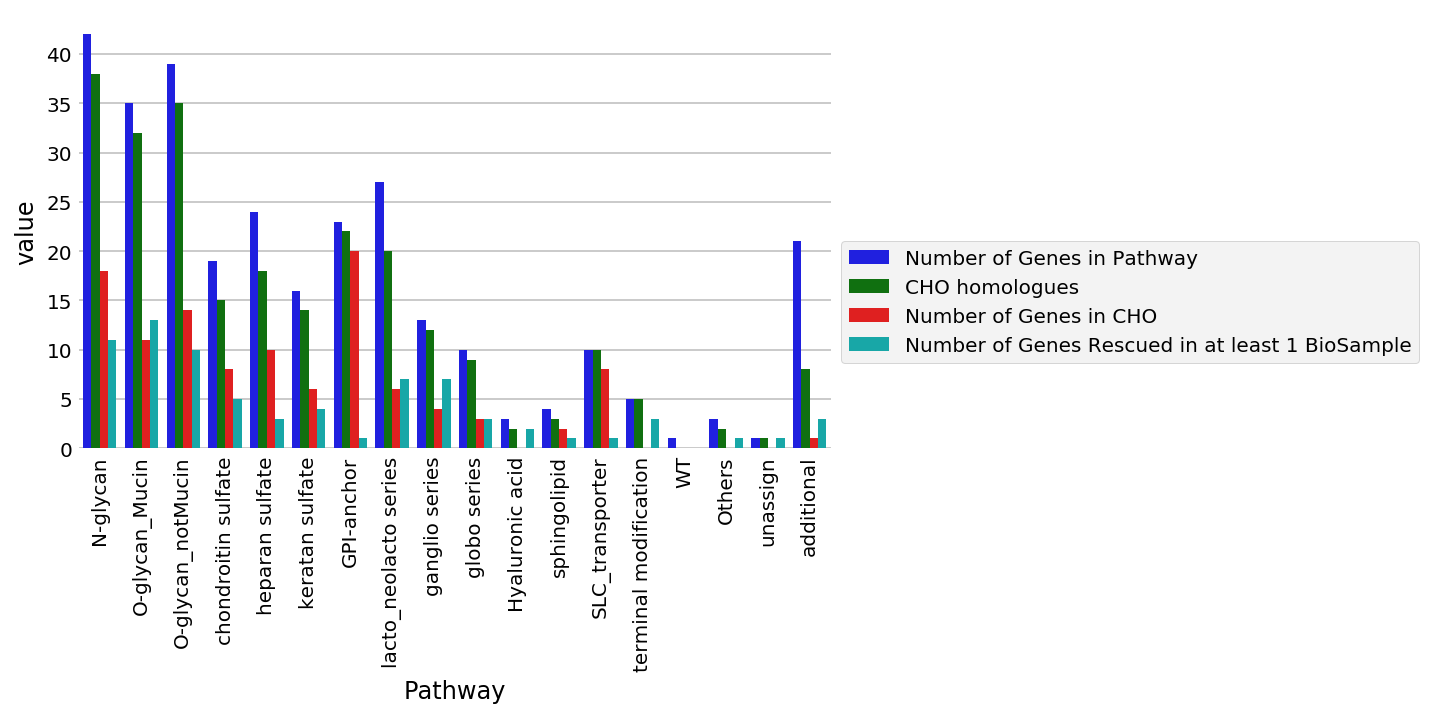

In [35]:
%matplotlib inline
bar_df = pd.merge(silenced_glyco_df, GT_CHO_hom, how='inner', left_index=True, right_index=True)
bar_df = bar_df.melt(id_vars="Pathway", value_vars=["Number of Genes in Pathway", "CHO homologues",
                                                                      "Number of Genes in CHO",
                                                                      "Number of Genes Rescued in at least 1 BioSample"])
sns.barplot(x="Pathway",y="value",hue="variable",
           data=bar_df)
plt.xticks(rotation=90)
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
silenced_glyco_df.to_csv(join(save_dir,"GT_pathway_genes.csv"))
helper_save(join(save_dir,"GT_pathway_genes"))

## Different pathway

ALG
Xylosyltransferases
Fucosyltransferases
Mannosyltransferases
Galactosyltransferases
N-Acetylgalactosaminyltransferases
N-Acetylglucosaminyltransferases
Glucosyltransferase
Sialyltransferases
GAG
Glucuronyltransferases
Sulfotransferases
Nucleotide Sugar Transporters
α-Dystroglycan Modification
GPI EtNP Transferase
GPI Transamidase
WT
Others


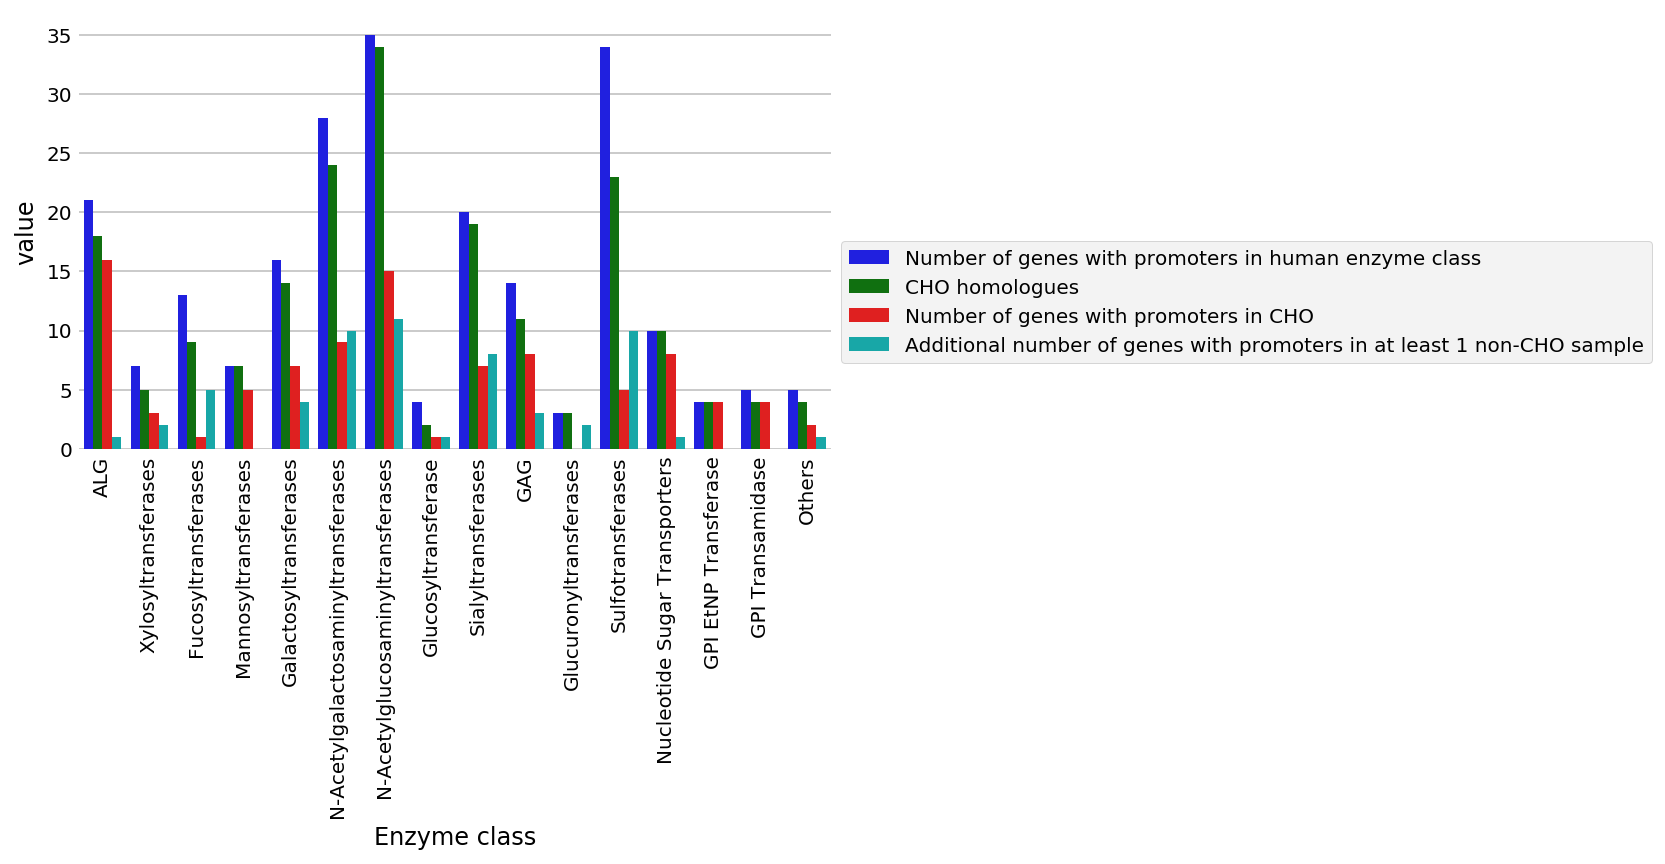

In [51]:
GT = pd.read_excel(join(supplemental,'GT_genes','GTclass.xlsx'),sheet_name="Enzymatic Activity")
GT_CHO_hom = pd.DataFrame(GT.apply(lambda x: x.isin(gene_df.index.str.upper().values).sum())).rename({0: "CHO homologues"}, axis=1)

silenced_glyco_df = pd.DataFrame(columns=["Enzyme class", "Number of genes with promoters in human enzyme class", 
                      "Number of genes with promoters in CHO", "Additional number of genes with promoters in at least 1 non-CHO sample",
                                 "Number of genes with promoters Rescued in at least 3 BioSample"])
#                      "Additional number of genes with promoters in at least 1 non-CHO sample","Number of genes with promoters Rescued in all BioSamples"],
#             index={"ER", "Secretory Machinery", "DNA Repair Genes", "Apoptotic", "N-Glyosylation",})

for k in GT.columns:
    print(k)

    curr_genes = GT[k].dropna().values
    
    curr_in_cho = len(set(curr_genes).intersection(set(in_cho)))
    curr_not_in_cho = len(set(curr_genes).intersection(set(not_in_cho)))

    #print(curr_genes.intersection(set(in_cho)))
    #print(curr_genes.intersection(set(not_in_cho)))
    
    silenced_glyco_df = pd.concat((silenced_glyco_df, pd.DataFrame({"Enzyme class": k,
                                                "Number of genes with promoters in human enzyme class": len(curr_genes),
                                                "Number of genes with promoters in CHO": curr_in_cho,
                                                "Additional number of genes with promoters in at least 1 non-CHO sample": curr_not_in_cho,
                                                }, 
                                               index=[k])),sort=False)
    
%matplotlib inline
# Drop class w no homologues
bar_df = pd.merge(GT_CHO_hom.loc[GT_CHO_hom["CHO homologues"]!=0],silenced_glyco_df, how='inner', left_index=True, right_index=True)
bar_df = bar_df.melt(id_vars="Enzyme class", value_vars=["Number of genes with promoters in human enzyme class", "CHO homologues",
                                                                      "Number of genes with promoters in CHO",
                                                                      "Additional number of genes with promoters in at least 1 non-CHO sample"])
    
sns.barplot(x="Enzyme class",y="value",hue="variable",
           data=bar_df)
plt.xticks(rotation=90)
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
helper_save(join(save_dir,"GT_Enzyme class_genes_enzymatic_activity"))
silenced_glyco_df.to_csv(join(save_dir,"GT_Enzyme class_genes_enzymatic_activity.csv"))

,CHO homologues
ALG,18
Xylosyltransferases,5
Fucosyltransferases,9
Mannosyltransferases,7
Galactosyltransferases,14
N-Acetylgalactosaminyltransferases,24
N-Acetylglucosaminyltransferases,34
Glucosyltransferase,2
Sialyltransferases,19
GAG,11


In [44]:
pd.merge(GT_CHO_hom,silenced_glyco_df, how='inner', left_index=True, right_index=True)

,CHO homologues,Pathway,Number of Genes in human enzyme class,Number of Genes in CHO,Number of Genes Rescued in at least 1 BioSample,Number of Genes Rescued in at least 3 BioSample
ALG,18,ALG,21,16,1,NaN
Xylosyltransferases,5,Xylosyltransferases,7,3,2,NaN
Fucosyltransferases,9,Fucosyltransferases,13,1,5,NaN
Mannosyltransferases,7,Mannosyltransferases,7,5,0,NaN
Galactosyltransferases,14,Galactosyltransferases,16,7,4,NaN
N-Acetylgalactosaminyltransferases,24,N-Acetylgalactosaminyltransferases,28,9,10,NaN
N-Acetylglucosaminyltransferases,34,N-Acetylglucosaminyltransferases,35,15,11,NaN
Glucosyltransferase,2,Glucosyltransferase,4,1,1,NaN
Sialyltransferases,19,Sialyltransferases,20,7,8,NaN
GAG,11,GAG,14,8,3,NaN


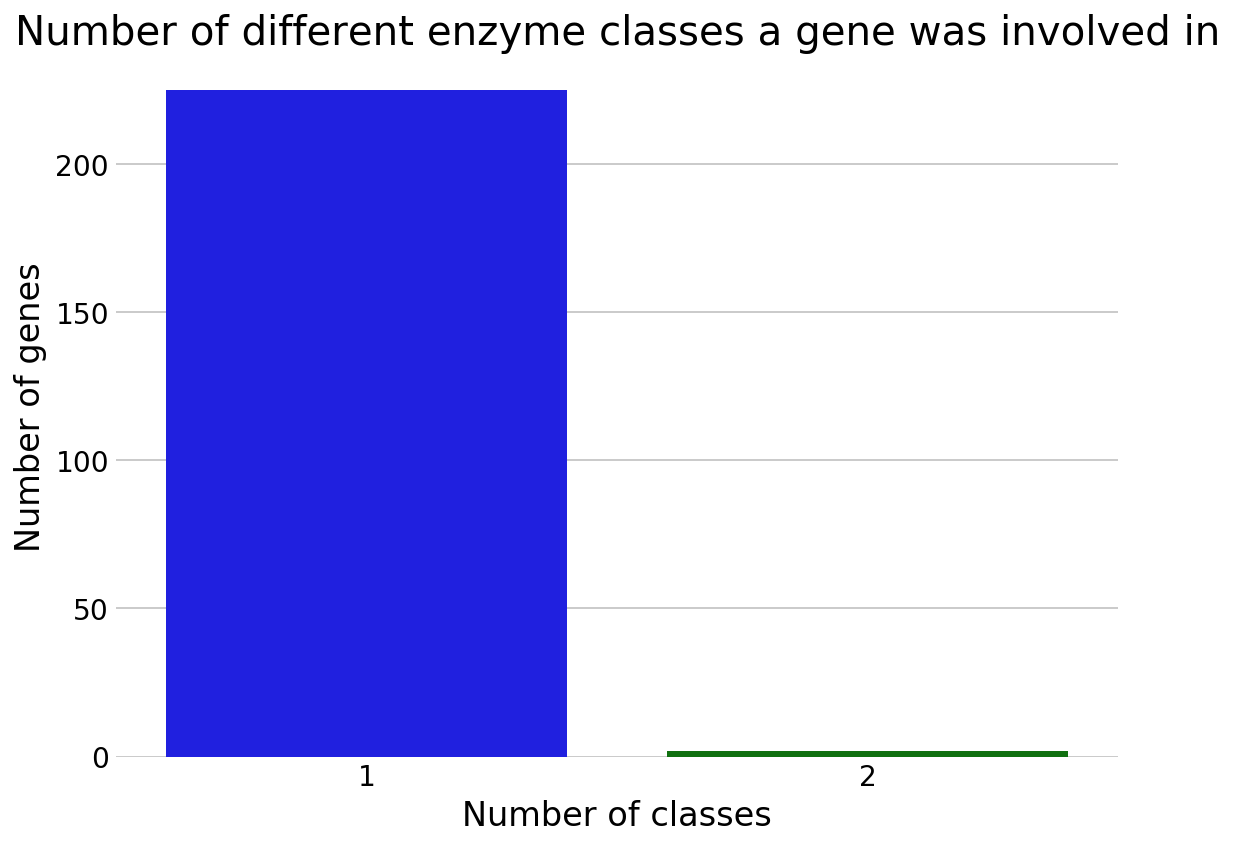

In [43]:
num_overlaps = []
for i in set(GT.astype(str).values.flatten()):
    if i != 'nan':
        curr = (GT.loc[:,:] == i).sum()
        num_overlaps.append((curr>=1).sum())

sns.countplot(num_overlaps)
plt.title("Number of different enzyme classes a gene was involved in")
plt.xlabel("Number of classes")
plt.ylabel("Number of genes")
helper_save(join(save_dir,"GT_enzymes_genes"))

## Using the Figure that Nate sent us

In [23]:
genes_from_figure = ["B4GALNT2"
,"B3GAT1"
,"B3GAT2"
,"A4GNT"
,"ST3GAL1"
,"ST3GAL2"
,"ST3GAL3"
,"ST3GAL4"
,"ST3GAL5"
,"ST3GAL6"
,"ST6GAL1"
,"ST6GAL2"
,"ST6GALNAC1"
,"ST6GALNAC2"
,"ST6GALNAC3"
,"ST6GALNAC4"
,"ST6GALNAC5"
,"ST6GALNAC6"
,"ST8SIA1"
,"ST8SIA2"
,"ST8SIA3"
,"ST8SIA4"
,"ST8SIA5"
,"ST8SIA6"
,"ABO"
,"FUT1"
,"FUT2"
,"FUT3"
,"FUT4"
,"FUT5"
,"FUT6"
,"FUT7"
,"FUT9"
,"FUT10"
,"FUT11"
,"B3GALT1"
,"B3GALT2"
,"B3GALT4"
,"B3GALT5"
,"B3GNT2"
,"B3GNT3"
,"B3GNT4"
,"B3GNT7"
,"B3GNT8"
,"B3GNT9"
,"B4GALNT3"
,"B4GALNT4"
,"B4GALT1"
,"B4GALT2"
,"B4GALT3"
,"B4GALT4"
,"GCNT2"
,"GCNT7"
,"GCNT4"
,"MGAT2"
,"EXT1"
,"CHPF"
,"GCNT3"
,"MGAT3"
,"MGAT4C"
,"MGAT4B"
,"MGAT4A"
,"MGAT5"
,"LARGE2"
,"LARGE1"
,"CHPF2"
,"CHSY1"
,"CHSY3"
,"CSGALNACT1"
,"CSGALNACT2"
,"EXT2"
,"EXTL1"
,"EXTL2"
,"EXTL3"
,"PIGV"
,"PIGM"
,"PIGZ"
,"PIGB"
,"C1GALT1"
,"C1GALT1C1"
,"B3GNT6"
,"GCNT1"
,"GCNT3"
,"GCNT4"
,"B4GALT6"
,"MGAT1"
,"B4GALT7"
,"XXYLT1"
,"MFNG"
,"B3GLCT"
,"POMGNT2"
,"POMGNT1"
,"GXYLT1"
,"GXYLT2"
,"LFNG"
,"RFNG"
,"B4GALT5"
,"B3GALT6"
,"B3GAT3"
,"MGAT5B"
,"B3GALNT2"
,"A4GALT"
,"B4GALNT1"
,"B3GNT5"
,"B3GALNT1"
,"FKRP"
,"FKTN"
,"B4GAT1"
,"RXYLT1"
,"MGAT4D"
,"FUT8"
,"COLGALT2"
,"GALNT5"
,"GALNT14"
,"GALNT17"
,"GALNT19"
,"GALNT8"
,"ALG1"
,"ALG2"
,"ALG3"
,"ALG5"
,"ALG6"
,"ALG8"
,"ALG9"
,"ALG10"
,"ALG10B"
,"ALG11"
,"ALG12"
,"ALG13"
,"ALG14"
,"DPM1"
,"STT3A"
,"STT3B"
,"GALNT1"
,"GALNT2"
,"GALNT3"
,"GALNT4"
,"GALNT6"
,"GALNT7"
,"GALNT9"
,"GALNT10"
,"GALNT11"
,"GALNT12"
,"GALNT15"
,"GALNT16"
,"GALNT18"
,"GALNT20"
,"GALNT13"
,"XYLT1"
,"XYLT2"
,"UGCG"
,"PIGA"
,"UGT8"
,"POGLUT1"
,"POFUT1"
,"POFUT2"
,"OGT"
,"EOGT"
,"COLGALT1"
,"POMT1"
,"POMT2"
,"DPY19L1"
,"DPY19L2"
,"DPY19L3"
,"POGLUT2"
,"POGLUT3"
,"DPY19L4"
,"TMTC1"
,"TMTC2"
,"TMTC3"
,"TMTC4"]
genes_from_figure

['B4GALNT2',
 'B3GAT1',
 'B3GAT2',
 'A4GNT',
 'ST3GAL1',
 'ST3GAL2',
 'ST3GAL3',
 'ST3GAL4',
 'ST3GAL5',
 'ST3GAL6',
 'ST6GAL1',
 'ST6GAL2',
 'ST6GALNAC1',
 'ST6GALNAC2',
 'ST6GALNAC3',
 'ST6GALNAC4',
 'ST6GALNAC5',
 'ST6GALNAC6',
 'ST8SIA1',
 'ST8SIA2',
 'ST8SIA3',
 'ST8SIA4',
 'ST8SIA5',
 'ST8SIA6',
 'ABO',
 'FUT1',
 'FUT2',
 'FUT3',
 'FUT4',
 'FUT5',
 'FUT6',
 'FUT7',
 'FUT9',
 'FUT10',
 'FUT11',
 'B3GALT1',
 'B3GALT2',
 'B3GALT4',
 'B3GALT5',
 'B3GNT2',
 'B3GNT3',
 'B3GNT4',
 'B3GNT7',
 'B3GNT8',
 'B3GNT9',
 'B4GALNT3',
 'B4GALNT4',
 'B4GALT1',
 'B4GALT2',
 'B4GALT3',
 'B4GALT4',
 'GCNT2',
 'GCNT7',
 'GCNT4',
 'MGAT2',
 'EXT1',
 'CHPF',
 'GCNT3',
 'MGAT3',
 'MGAT4C',
 'MGAT4B',
 'MGAT4A',
 'MGAT5',
 'LARGE2',
 'LARGE1',
 'CHPF2',
 'CHSY1',
 'CHSY3',
 'CSGALNACT1',
 'CSGALNACT2',
 'EXT2',
 'EXTL1',
 'EXTL2',
 'EXTL3',
 'PIGV',
 'PIGM',
 'PIGZ',
 'PIGB',
 'C1GALT1',
 'C1GALT1C1',
 'B3GNT6',
 'GCNT1',
 'GCNT3',
 'GCNT4',
 'B4GALT6',
 'MGAT1',
 'B4GALT7',
 'XXYLT1',
 'MFNG',
 'B3GLCT',

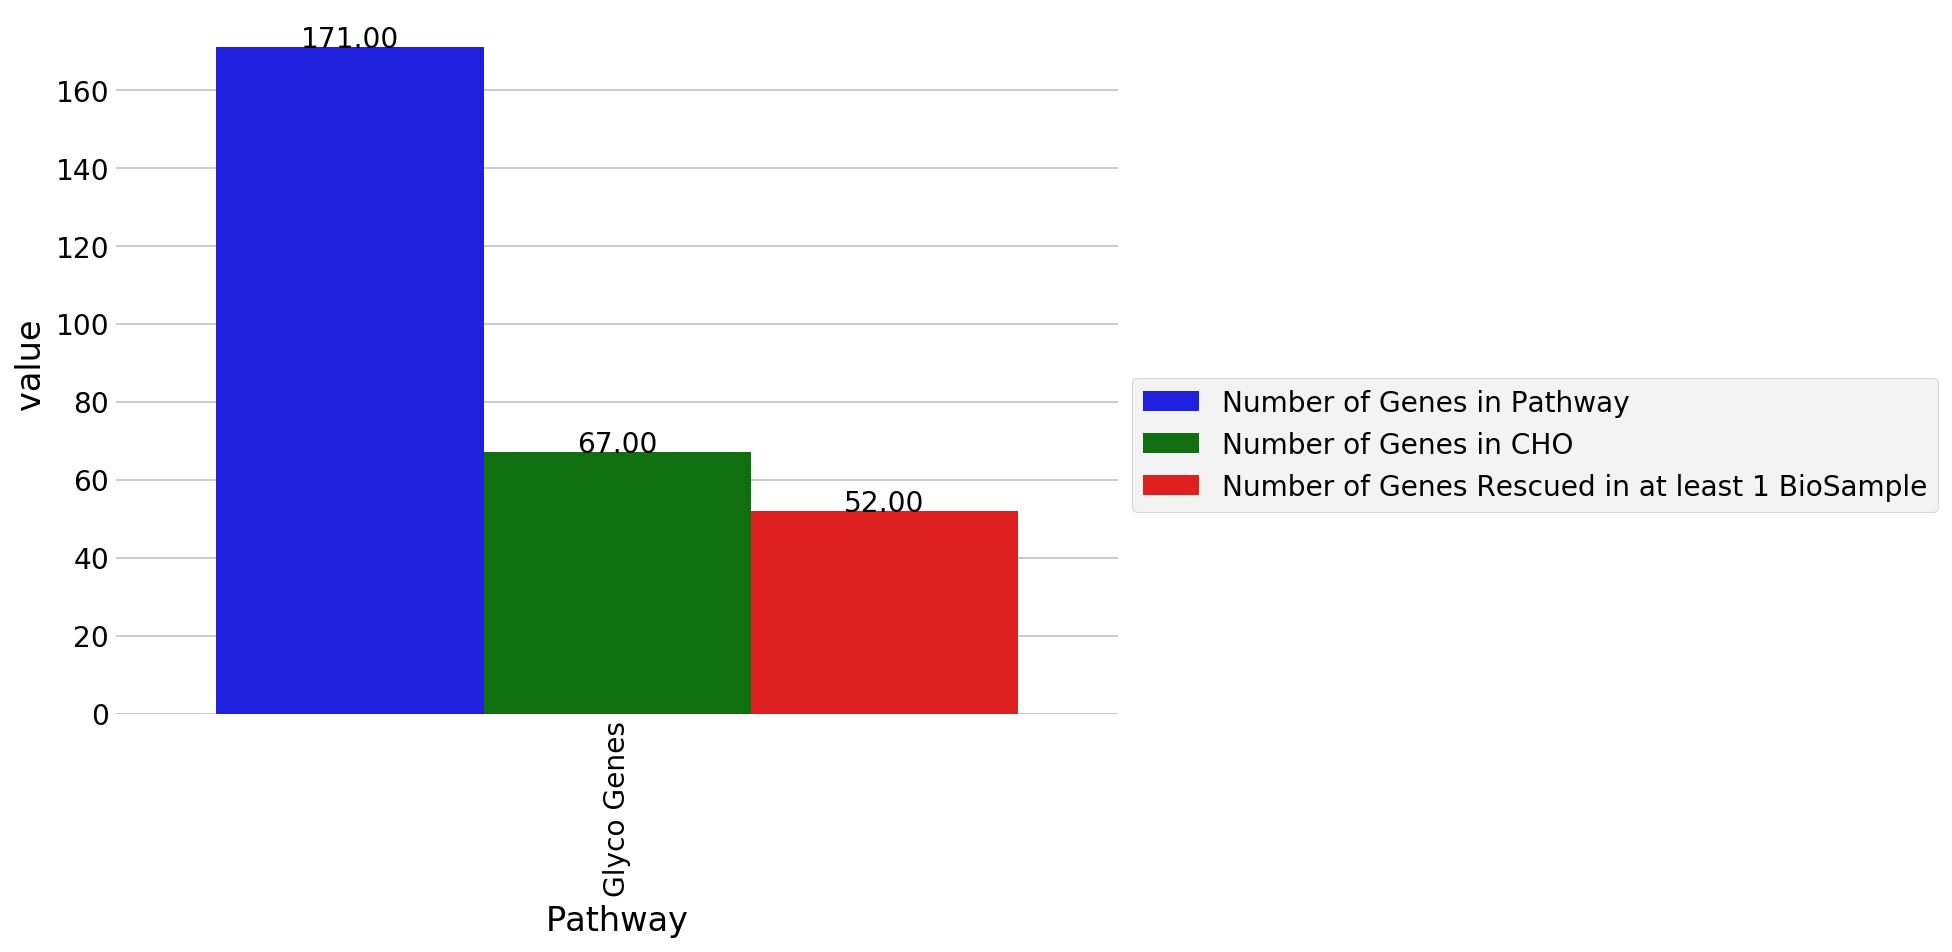

In [24]:
silenced_glyco_df = pd.DataFrame(columns=["Pathway", "Number of Genes in Pathway", 
                      "Number of Genes in CHO", "Number of Genes Rescued in at least 1 BioSample",
                                 "Number of Genes Rescued in at least 3 BioSample"])
curr_in_cho_set = set(genes_from_figure).intersection(set(in_cho))
curr_in_cho = len(curr_in_cho_set)
curr_not_in_cho_set = set(genes_from_figure).intersection(set(not_in_cho))
curr_not_in_cho = len(curr_not_in_cho_set)

#print(curr_genes.intersection(set(in_cho)))
#print(curr_genes.intersection(set(not_in_cho)))

silenced_glyco_df = pd.concat((silenced_glyco_df, pd.DataFrame({"Pathway": "Glyco Genes",
                                            "Number of Genes in Pathway": len(genes_from_figure),
                                            "Number of Genes in CHO": curr_in_cho,
                                            "Number of Genes Rescued in at least 1 BioSample": curr_not_in_cho,
                                            }, 
                                           index=["Genes from Figure"])),sort=False)

bar_df = silenced_glyco_df.melt(id_vars="Pathway", value_vars=["Number of Genes in Pathway",
                                                                      "Number of Genes in CHO",
                                                                      "Number of Genes Rescued in at least 1 BioSample"])
g = sns.barplot(x="Pathway",y="value",hue="variable", data=bar_df)

# for index, row in bar_df.iterrows():
#     g.text(row.name,row["variable"],row["value"], color='black', ha="center")

plt.xticks(rotation=90)
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
show_values_on_bars(g)
helper_save(join(save_dir,"GT_from_figure"))
silenced_glyco_df.to_csv(join(save_dir,"GT_from_figure.csv"))

In [25]:
genes_from_figure_df = pd.DataFrame(set(genes_from_figure),columns=["Gene"])
genes_from_figure_df = genes_from_figure_df.set_index("Gene",drop=False)
genes_from_figure_df["Distance From Annotation"] = 0
genes_from_figure_df["TSS"] = ""
genes_from_figure_df.loc[curr_in_cho_set,"TSS"] = "TSS seen in CHO"
genes_from_figure_df.loc[curr_not_in_cho_set,"TSS"] = "TSS seen in additional Tissues"
genes_from_figure_df.loc[genes_from_figure_df["TSS"] == "","TSS"] = "Not seen"
genes_from_figure_df

,Gene,Distance From Annotation,TSS
Gene,,,
B3GAT1,B3GAT1,0,TSS seen in additional Tissues
FUT5,FUT5,0,Not seen
CSGALNACT1,CSGALNACT1,0,TSS seen in additional Tissues
A4GALT,A4GALT,0,TSS seen in additional Tissues
POMT2,POMT2,0,Not seen
...,...,...,...
FKTN,FKTN,0,Not seen
GCNT7,GCNT7,0,Not seen
EXTL3,EXTL3,0,TSS seen in CHO


In [26]:
p = cu.get_colors('categorical',genes_from_figure_df["TSS"].unique(),n_colors=3, use_white=True, white_name='Not Seen')
colormap=p[0]

Generating palette: 100% |######################################| Time: 0:00:03


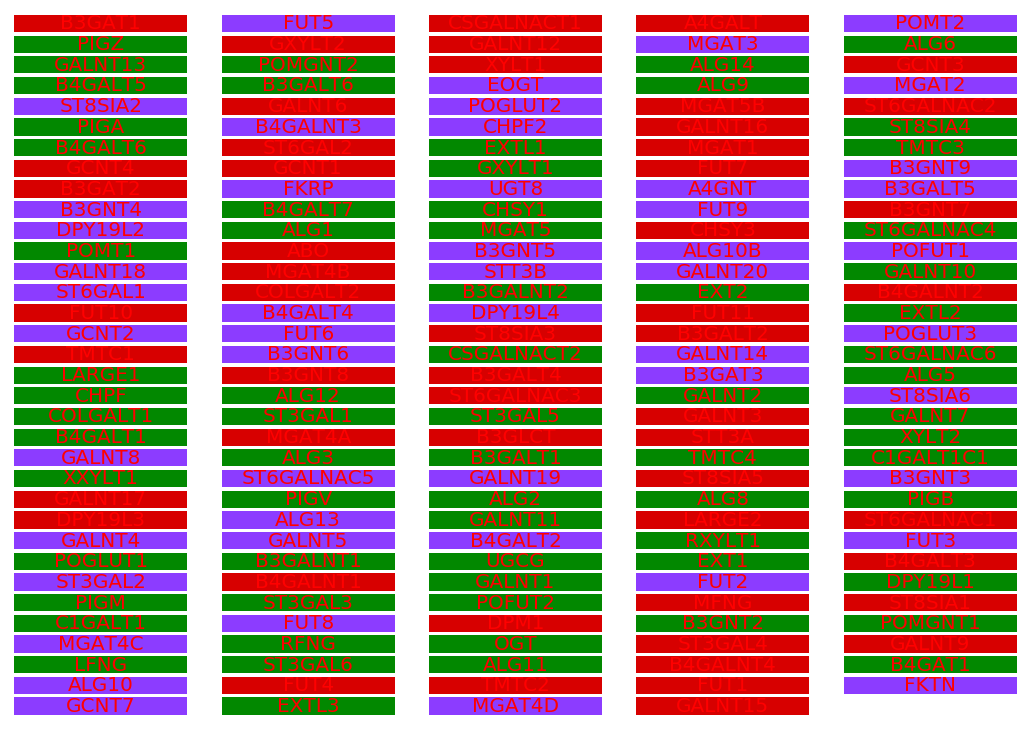

In [27]:
f,axs = plt.subplots(nrows=int(np.ceil(len(genes_from_figure_df)/5)),ncols=5)

# f,axs = plt.subplots(nrows=int(np.ceil(np.sqrt(len(genes_from_figure_df)))),
#                      ncols=int(np.ceil(np.sqrt(len(genes_from_figure_df)))))

count = 0
for ind,val in genes_from_figure_df.iterrows():
    
    patch = plt.Circle((0,0), radius= 5, color=colormap[val["TSS"]])
    
    ax = axs.flatten()[count] # plt.gca()
    ax.add_patch(patch)
    plt.axis('scaled')

    left, width = .25, .5
    bottom, height = .25, .5
    right = left + width
    top = bottom + height

    ax.text(0.5*(left+right), 0.5*(bottom+top), val["Gene"],
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=10, color='red',
            transform=ax.transAxes)
    count += 1
    
for ax in axs.flatten():
    ax.axis('off')
    
helper_save(join(save_dir,"GT_from_figure_genes_list"))
genes_from_figure_df.to_csv(join(save_dir,"GT_from_figure_genes_list.csv"))

## With Distance to anno